In [1]:
import os
from IPython.display import clear_output

In [2]:
# ==============================================================================
# Enabling Logging
# ==============================================================================

import logging

# Logger Settings:
logging.basicConfig(level=logging.WARNING)
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')

def setup_logger(name, log_file, level=logging.INFO):
    """To setup as many loggers as you want"""
    handler = logging.FileHandler(log_file)        
    handler.setFormatter(formatter)
    logger = logging.getLogger(name)
    logger.setLevel(level)
    logger.addHandler(handler)
    return logger

# Phases Logger
phases_logger_file = 'log_phases.log'
os.system('rm -rf '+ phases_logger_file)
phases_logger = setup_logger('Phases', phases_logger_file)
phases_logger.info('Project : Predicting Stock Price')
phases_logger.info('Phases Logger Init')

# Details Logger
details_logger_file = 'log_details.log'
os.system('rm -rf '+ details_logger_file)
details_logger = setup_logger('Details', details_logger_file)
details_logger.info('Project : Predicting Stock Price')
details_logger.info('Details Logger Init')


INFO:Phases:Project : Predicting Stock Price
INFO:Phases:Phases Logger Init
INFO:Details:Project : Predicting Stock Price
INFO:Details:Details Logger Init


In [3]:
# ==============================================================================
# Importing Basic Packages
# ==============================================================================

phases_logger.info('Importing Basic Packages : Start')

details_logger.info('Import : re')
import re

details_logger.info('Import : os')
import os

details_logger.info('Import : sys')
import sys

phases_logger.info('Importing Basic Packages : End')

INFO:Phases:Importing Basic Packages : Start
INFO:Details:Import : re
INFO:Details:Import : os
INFO:Details:Import : sys
INFO:Phases:Importing Basic Packages : End


In [4]:
# ==============================================================================
# Importing Project Specific Packages
# ==============================================================================

phases_logger.info('Importing Project Specific Packages : Start')

# Identifying Customer Targets (Python)
details_logger.info('Import : inline')
%matplotlib inline

# import packages for text processing and machine learning
details_logger.info('Import : pandas')
import pandas as pd  # DataFrame structure and operations
from pandas.plotting import scatter_matrix  # scatter plot matrix

details_logger.info('Import : numpy')
import numpy as np  # arrays and numerical processing
import matplotlib.pyplot as plt  # 2D plotting

details_logger.info('Import : scipy')
from scipy.stats import uniform  # for training-and-test split

details_logger.info('Import : patsy')
import patsy  # translate model specification into design matrices

details_logger.info('Import : seaborn')
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

details_logger.info('Import : pymongo')
import pymongo # Importing MongoDatabase
# import user-defined module
# details_logger.info('import evaluate_classifier')
# import evaluate_classifier as eval

# FOLLOWING PACKAGE BEST IMPORTED AND INSTALLED VIA CONDA PROMPT
# conda install -c conda-forge mlxtend

# Association Rules Mining
# details_logger.info('import mlxtend')
# from mlxtend.frequent_patterns import apriori            # EASY ASSOCIATION RULES PACKAGE FROM RABST
# from mlxtend.frequent_patterns import association_rules

details_logger.info('Import : queue')
from queue import Queue

details_logger.info('Import : threading')
import threading

details_logger.info('Import : time')
import time

details_logger.info('Import : sklearn')
from sklearn.tree import DecisionTreeRegressor  # machine learning tree
from sklearn.ensemble import RandomForestRegressor # ensemble method
from sklearn.metrics import mean_squared_error

details_logger.info('Import : statsmodels')
import statsmodels.api as sm  # logistic regression
import statsmodels.formula.api as smf  # R-like model specification
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

#details_logger.info('Import : pmdarima')
#import pmdarima as pm

phases_logger.info('Project Specific Package Load : End')

INFO:Phases:Importing Project Specific Packages : Start
INFO:Details:Import : inline
INFO:Details:Import : pandas
INFO:Details:Import : numpy
INFO:Details:Import : scipy
INFO:Details:Import : patsy
INFO:Details:Import : seaborn
INFO:Details:Import : pymongo
INFO:Details:Import : queue
INFO:Details:Import : threading
INFO:Details:Import : time
INFO:Details:Import : sklearn
INFO:Details:Import : statsmodels
INFO:Phases:Project Specific Package Load : End


In [5]:
# ==============================================================================
# Present Working Directory
# ==============================================================================

# This will print the current directory : Debugging purposes
details_logger.info('PWD: ' + os.getcwd())

INFO:Details:PWD: /Users/aa000131/Documents/big-data-718/predictingstockprice


In [6]:
### FUNCTION TO NORMALIZE TIME SERIES DATA USING Detrend by Differencing
# FROM https://machinelearningmastery.com/time-series-trends-in-python/#AdThrive_Content_6_desktop
def remove_trends(values):
    diff = list()
    myValues = values
    #REMOVE nans from 
   #myValues = myValues[np.logical_not(np.isnan(myValues))]
    for i in range(0, len(myValues)):
        value = myValues[i] - myValues[i - 1]
        diff.append(value)
    return diff

In [66]:
# ==============================================================================
# List of all the csvs generated from top. Do not use _df.csv that will be used 
# later on 
# ==============================================================================
myCSVFilesList =  ['Open','Close','AdjustedClose','High','Low','Volume']
#myCSVFilesList =  ['Open']

In [8]:
# ==============================================================================
# Data base connections
# ==============================================================================
# Uncomment to connect to database
add_to_db = False
add_to_csv = True
if add_to_db == True:
    my_mongo_connetion_string = 'mongodb://localhost:27017/'
    client = pymongo.MongoClient(my_mongo_connetion_string)
    my_db = client['StockMarket']

    



In [67]:
# ==============================================================================
# Extrating a mini-csv file for the spf_500 tickers only
# ==============================================================================

#myCSVFilesList =  ['Open','Close','AdjustedClose','High','Low']
suffix = '_df.csv'
SP_tickerList = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALLE', 'ALTR', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ATVI', 'AVB', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-A', 'BHI', 'BIIB', 'BIO', 'BK', 'BLK', 'BMRA', 'BMY', 'BR', 'BRK-A', 'BSHI', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CCI', 'CDE', 'CDNS', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CINF', 'CL', 'CLX', 'CME', 'CMG', 'CMI', 'CNC', 'CNP', 'CNWT', 'COO', 'COP', 'COST', 'COTY', 'COWN', 'CPB', 'CPICQ', 'CPRT', 'CRM', 'CSCO', 'CTAS', 'CTQ', 'CTSH', 'CTXS', 'CUK', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DIS', 'DLTR', 'DOV', 'DPZ', 'DRE', 'DRI', 'DTE', 'DVA', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENS', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'EW', 'EXR', 'F', 'FANG', 'FAST', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FLS', 'FLT', 'FMBM', 'FMC', 'FN', 'FPLPF', 'FRC', 'FRMC', 'FRT', 'FTI', 'GD', 'GE', 'GGG', 'GILD', 'GIS', 'GM', 'GOOG', 'GPC', 'GPN', 'GRMN', 'GS-PJ', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HII', 'HLT', 'HOLX', 'HON', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HTLF', 'HUM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INTH', 'INTU', 'IP', 'IPGP', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KACPF', 'KEY', 'KEYS', 'KGNR', 'KHC', 'KIM', 'KMB', 'KMX', 'KO', 'KR', 'KSS', 'LBTYA', 'LDOS', 'LEG', 'LH', 'LKQ', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LYB', 'LYV', 'MAA', 'MAR', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOS', 'MPC', 'MRCR', 'MRK', 'MRO', 'MS-PF', 'MSCI', 'MSFT', 'MSI', 'MU', 'NCLH', 'NCTKF', 'NDAQ', 'NEE', 'NEOG', 'NFLX', 'NI', 'NLSN', 'NMHLY', 'NOC', 'NOK', 'NOV', 'NOW', 'NOXL', 'NRG', 'NSC', 'NTAP', 'NTRA', 'NTRR', 'NTRS', 'NVR', 'NVRO', 'NWL', 'O', 'ODFL', 'OKE', 'OMC', 'ORLY', 'OXY', 'PAYX', 'PCAR', 'PEG', 'PEP', 'PFE', 'PG', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNR', 'PNW', 'PNWRF', 'PPG', 'PRU', 'PSX', 'PVH', 'PWR', 'PXD', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RIBT', 'RJF', 'RL', 'RLI', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RSNHF', 'RXMD', 'SBUX', 'SCHW', 'SEE', 'SEGXF', 'SHW', 'SIVB', 'SLB', 'SLG', 'SNPS', 'SO', 'SONC', 'SPG', 'SRE', 'SRG', 'STT', 'STX', 'STZ-B', 'SWK', 'SWKS', 'SYF', 'SYK', 'T', 'TAP', 'TCYSF', 'TEL', 'TIME', 'TJX', 'TMO', 'TMUS', 'TRAUF', 'TROW', 'TRV', 'TSCO', 'TSN', 'TTWO', 'TW', 'TWTR', 'TXN', 'TXT', 'TYL', 'UA', 'UAL', 'UDR', 'UEEC', 'UHS', 'ULTA', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VFC', 'VMC', 'VRSK', 'VRSN', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WHR', 'WM', 'WMB', 'WRB', 'WRK', 'WSPOF', 'WST', 'WU', 'WY', 'WYNN', 'XEL', 'XLEFF', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
mystring = ','.join(SP_tickerList)
for myCSVFile in myCSVFilesList:
#     my_current_df = pd.read_csv(x+suffix, sep=',', header='infer')
    
#     my_current_df['Date'] = my_current_df['Date'].str.replace('-','/')
#     pd.to_datetime(my_current_df['Date'], infer_datetime_format=True)
#     my_current_df = my_current_df.set_index('Date')
#     #This just the raw form for the df where we moved the dates to index
#     #This will go in database (wait)
#     new_df_before_fill = my_current_df
#     my_current_df = my_current_df[:'24/10/2022']
#     #This is where we used ffill to resolve the nans in the df
#     #This will go in the database(wait)
#     my_current_df = my_current_df.fillna(method='ffill')
#     my_new_df = my_current_df
# #     if add_to_db == True:
# #         my_db_col = my_db[x]
# #         my_db_col.delete_many({})
  
# Uncomment these for debugging purposes:
    # print(myCSVFile)
    # details_logger.info('Processing File: ' + myCSVFile)
    my_current_df = pd.read_csv(myCSVFile+suffix, sep=',', header='infer')
    # Changing column name from 'Unnamed: 0' to 'Index'
    # (because we are going to merge based upon this column later on)
    my_current_df.columns = [col if col not in ('Unnamed: 0') else 'Index' for col in my_current_df.columns]
    my_current_df['Date'] = my_current_df['Date'].str.replace('-','/')
    my_current_df = my_current_df.set_index('Date')
    # Cutteing the frame after last date available. (Rest is all NaN)
    my_current_df = my_current_df[:'24/10/2022']
    #This is where we used ffill to resolve the nans in the df
    #This will go in the database(wait)
    my_current_df = my_current_df.fillna(method='ffill')
    # Creating basic normalized_df (we'll add normalized sequences to this frame)
    normalized_df = my_current_df[my_current_df.columns[[0, 1]]]
    acf_df = my_current_df[my_current_df.columns[[0, 1]]]
    

    #Get singular ticker values 
    for SPTickerSymbol in SP_tickerList:
        
#         my_dict = {}
# #         temp_df = my_new_df[y].dropna()
# #         ticker_values = temp_df.values
# #         temp_df = temp_df.to_frame()
#         temp_df = my_current_df[['index', y]]
#         temp_df = temp_df[temp_df[y].notna()]
       
#         #my_temp_df = my_new_df[y]
#         #print(my_temp_df)
    
#         #RemovingTrend
#         #We will store this after the loop has bee
#         normalized_values = remove_trends(ticker_values)
#         #print(type(normalized_values))
#         #df2 = df.assign(TutorsAssigned=tutors)
#         #temp_df= temp_df.assign(NewValues=normalized_values)
#         #print(normalized_values)
#         #AUTOCORELATION 
#         #FROM https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/#statsmodels-library
#         # For nlags I have len(normalized_values)-1 update this as needed
#         #store this in database 
#         acc_r= sm.tsa.acf(normalized_values, nlags = len(normalized_values)-1)
      
#         # Adding the normalizd values to temp_df in "SPTickerSymbol_normalized" column
#         # We have to do this step because we cannot directly put these
#         # into normalized_df (Remember we dropped some rows from full dataframe?)
#         temp_df = temp_df.assign(SPTickerSymbol_normalized=normalized_values)
#         temp_df = temp_df.assign(AutoCorrleation=acc_r)

#         #Removing any added collection so that the collection data does not get bloated           
#         my_dict = {
#             'TickerSymbol':y,
#             'removed_trends':normalized_values,
#             #need to seralize this orelse data will not save in the database 
#             # https://stackoverflow.com/questions/6367589/saving-numpy-array-in-mongodb
#             'autocorrelation':acc_r.tolist()
#         }
            
#         normalized_df = pd.merge(normalized_df, temp_df[['index', 'SPTickerSymbol_normalized','AutoCorrleation']],  how='left', left_on=['Index'], right_on = ['Index'], suffixes=('', '_'))
#         normalized_df.columns = [col if col not in ('SPTickerSymbol_normalized') else y for col in normalized_df.columns]
#         normalized_df.columns = [col if col not in ('AutoCorrleation') else y for col in normalized_df.columns]
#         clear_output(wait=False)
#         print(normalized_df)
#         sys.exit()

# Uncomment these for debugging purposes:
        # print(SPTickerSymbol)
        # details_logger.info('Processing Ticker Symbol: ' + SPTickerSymbol)
        temp_df = my_current_df[['Index', SPTickerSymbol]]
        temp_df = temp_df[temp_df[SPTickerSymbol].notna()]
        
        temp_df_two = my_current_df[['Index', SPTickerSymbol]]
        temp_df_two = temp_df_two[temp_df_two[SPTickerSymbol].notna()]
        #RemovingTrend
        #We will store this after the loop has bee
        ticker_values = temp_df[SPTickerSymbol]
        ticker_values_two = temp_df_two[SPTickerSymbol]
        normalized_values = remove_trends(ticker_values)
        acc_r= sm.tsa.acf(normalized_values, nlags = len(normalized_values)-1)
        # Adding the normalizd values to temp_df in "SPTickerSymbol_normalized" column
        # We have to do this step because we cannot directly put these
        # into normalized_df (Remember we dropped some rows from full dataframe?)
        temp_df = temp_df.assign(SPTickerSymbol_normalized=normalized_values)
        temp_df_two = temp_df_two.assign(AutoCorrelationValue=acc_r)
        
        # Merging the "SPTickerSymbol_normalized" column into the "normalized_df"
        # Now, match the Index columns of the two dataframes and merge
        # 'SPTickerSymbol_normalized' from temp_df into 'normalized_df'
        normalized_df = pd.merge(normalized_df, temp_df[['Index', 'SPTickerSymbol_normalized']],  how='left', left_on=['Index'], right_on = ['Index'], suffixes=('', '_'))
        normalized_df.columns = [col if col not in ('SPTickerSymbol_normalized') else SPTickerSymbol for col in normalized_df.columns]
       
        acf_df = pd.merge(acf_df, temp_df_two[['Index', 'AutoCorrelationValue']],  how='left', left_on=['Index'], right_on = ['Index'], suffixes=('', '_'))
        acf_df.columns = [col if col not in ('AutoCorrelationValue') else SPTickerSymbol for col in normalized_df.columns]

            
    normalized_df.to_csv(myCSVFile+'_normalized_df.csv', sep=',', encoding='utf-8')
    acf_df.to_csv(myCSVFile+'_auto_corr_df.csv', sep=',', encoding='utf-8')
        
        
        

#when extracting from database make sure to deserialize
#x = np.fromiter( autocorrelation from db )    
        
    



In [63]:
print(x)

['Open', 'Close', 'AdjustedClose', 'High', 'Low']


<AxesSubplot:xlabel='Date'>

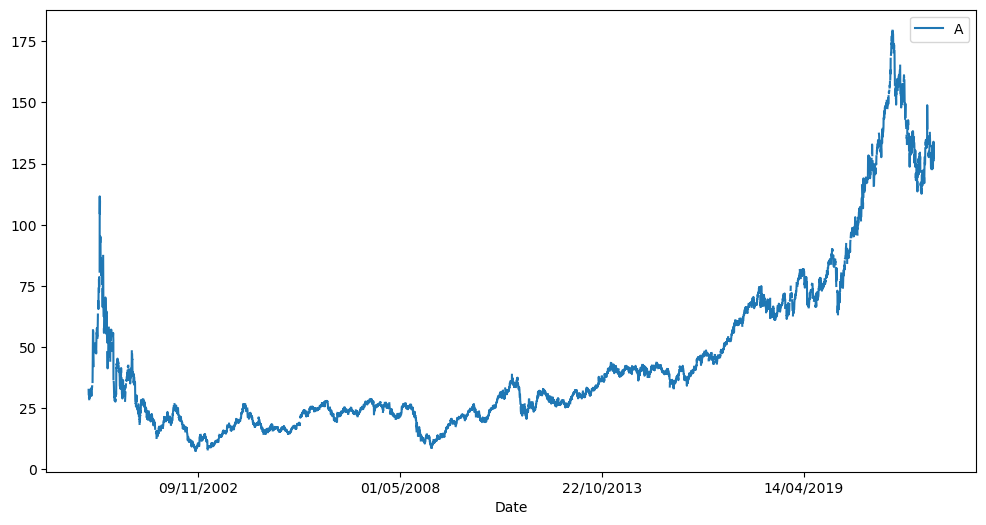

In [66]:
new_df_before_fill.plot(use_index=True, y='A', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

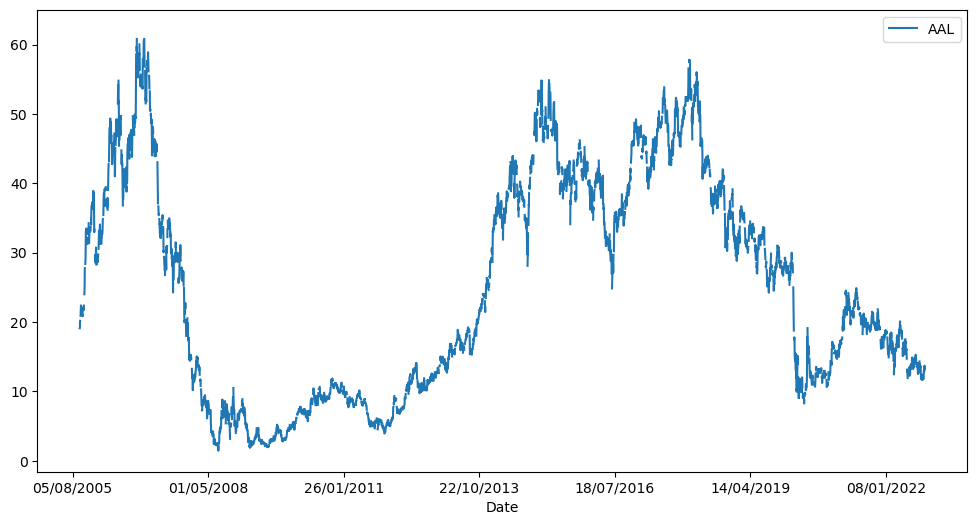

In [78]:
new_df_before_fill.plot(use_index=True, y='AAL', figsize=(12,6))

<AxesSubplot:xlabel='Date'>

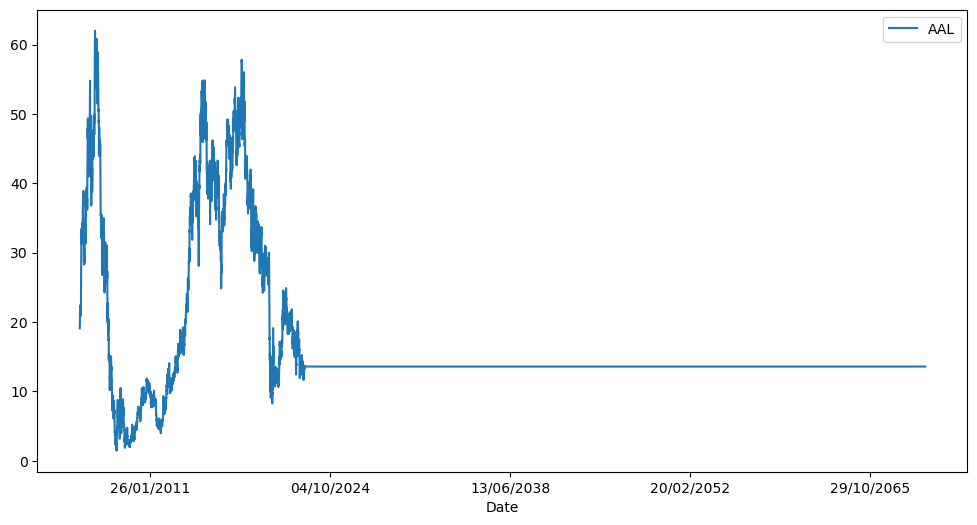

In [79]:
 my_new_df.plot(use_index=True, y='AAL', figsize=(12,6))

In [80]:
myValues = my_new_df['AAL'].values

In [81]:
myValues = myValues[np.logical_not(np.isnan(myValues))]

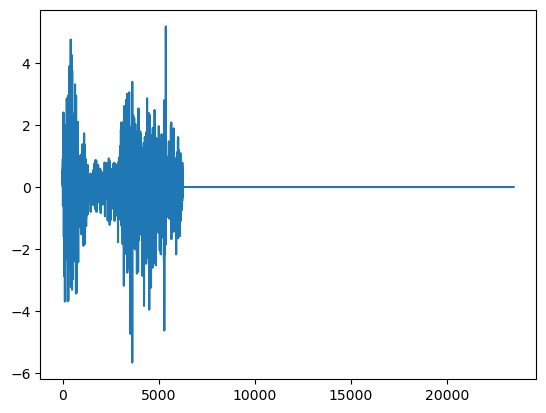

In [83]:
diff = list()
for i in range(1, len(myValues)):
    value = myValues[i] - myValues[i - 1]
    diff.append(value)
plt.plot(diff)

In [ ]:
### FUNCTION TO NORMALIZE TIME SERIES DATA USING Detrend by Differencing
# FROM https://machinelearningmastery.com/time-series-trends-in-python/#AdThrive_Content_6_desktop
def normalize_time_data(values):
    diff = list()
    #REMOVE nans from 
    myValues = myValues[np.logical_not(np.isnan(myValues))]
    for i in range(1, len(myValues)):
        value = myValues[i] - myValues[i - 1]
        diff.append(value)
    return diff

In [84]:
#AUTOCORELATION 
#FROM https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/#statsmodels-library
import statsmodels.api as sm
my_acc = sm.tsa.acf(diff, nlags = len(diff)-1)

In [89]:
print(my_acc)

[ 1.00000000e+00 -4.33922663e-02 -1.48651276e-03 ...  7.44789870e-07
  7.43235597e-07  7.41681324e-07]


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.01075007,  0.00957191, -0.04145859, -0.02388437, -0.01377035,
        -0.03556581,  0.02482584,  0.07965165,  0.00605588,  0.12306356,
         1.        ,  0.12306356,  0.00605588,  0.07965165,  0.02482584,
        -0.03556581, -0.01377035, -0.02388437, -0.04145859,  0.00957191,
        -0.01075007]),
 <matplotlib.lines.Line2D at 0x7fb5c96a2550>)

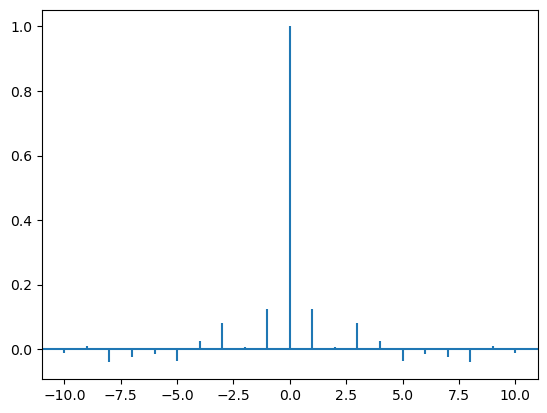

In [85]:
#FROM https://www.geeksforgeeks.org/autocorrelation-plot-using-matplotlib/
plt.acorr(my_acc,maxlags = 10)

In [71]:
my_docs =my_db.Open.find({'TickerSymbol':'A'})
my_docs_two =my_db.Open.find({'TickerSymbol':'AAL'})
for doc in my_docs:
    my_ac_one = doc['autocorrelation']
for items in my_docs
    my_ac_two = doc['autocorrelation']

In [66]:
# my_docs =my_db.Open.find()
# for doc in my_docs:
#     print(doc)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [77]:
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data =  np.fromiter(my_ac_one) , x = 'autocorrelation')
sns.lineplot(data =  np.fromiter(my_ac_two, x = 'autocorrelatio' )
plt.title('Search vs Registeration of IELTS', weight='bold', fontsize = 15)
plt.ylabel('IELTS Search and Registration Count', weight='bold', fontsize = 12)
plt.xlabel('Week', weight='bold', fontsize = 12)
plt.show()

SyntaxError: unexpected EOF while parsing (3320464374.py, line 3)